# Numpy, la brique de base de la data science

Lino Galiana  
2024-10-31

<div class="badge-container"><div class="badge-text">Pour essayer les exemples présents dans ce tutoriel :</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/manipulation/01_numpy.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«01_numpy»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«manipulation%2001_numpy%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=visualstudiocode&logoColor=blue" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«01_numpy»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«manipulation%2001_numpy%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks//blob/main//notebooks/manipulation/01_numpy.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Version 🇫🇷</h3>
This is the French version 🇫🇷 of that chapter,to see the English version go <a href="https://pythonds.linogaliana.fr/content/manipulation/01_numpy.html">there</a>
</div>

# 1. Introduction

Ce chapitre constitue une introduction à *Numpy* pour
s’assurer que les bases du calcul vectoriel avec `Python`
soient maîtrisées. La première partie du chapitre
présente des petits exercices pour pratiquer
quelques fonctions basiques de `Numpy`. La fin du chapitre présente
des exercices pratiques d’utilisation de `Numpy` plus approfondis.

Il est recommandé de régulièrement se référer à
la [*cheatsheet numpy*](https://www.datacamp.com/community/blog/python-numpy-cheat-sheet) et à la
[doc officielle](https://numpy.org/doc/stable/) en cas de doute
sur une fonction.

Dans ce chapitre, on ne dérogera pas à la convention qui s’est imposée
d’importer `Numpy` de la
manière suivante :

In [2]:
import numpy as np


Nous allons également fixer la racine du générateur aléatoire de nombres
afin d’avoir des résultats reproductibles :

In [3]:
np.random.seed(12345)


<div class="alert alert-info" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-comment"></i> Note</h3>

Les auteurs
de `numpy` [préconisent désormais](https://numpy.org/doc/stable/reference/random/index.html)
de privilégier l’utilisation de
générateurs via la fonction `default_rng()` plutôt que la simple utilisation de `numpy.random`.

Afin d’être en phase avec les codes qu’on peut trouver partout sur internet, nous
conservons encore `np.random.seed` mais cela peut être amené à évoluer.

</div>

<div class="alert alert-info" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-comment"></i> Note</h3>

The authors of `numpy` [now recommend](https://numpy.org/doc/stable/reference/random/index.html) using generators via the `default_rng()` function rather than simply using `numpy.random`.

To stay consistent with the codes found everywhere on the internet, we still use `np.random.seed`, but this may change in the future.

</div>

# 2. Le concept d’*array*

Dans le monde de la science des données, comme cela sera évoqué
plus en profondeur dans les prochains chapitres,
l’objet central est le tableau à deux dimensions de données.
La première correspond aux lignes et la seconde aux colonnes.
Si on ne se préoccupe que d’une dimension, on se rapporte
à une variable (une colonne) de notre tableau de données.
Il est donc naturel de faire le lien entre les
tableaux de données et l’objet mathématique
que sont les matrices et les vecteurs.

`NumPy` (`Numerical Python`) est la brique de base
pour traiter des listes numériques ou des chaines
de textes comme des matrices.
`NumPy` intervient pour proposer
ce type d’objets, et
les opérations standardisées associées qui n’existent
pas dans le langage `Python` de base.

L’objet central de `NumPy` est
l’**`array`** qui est un tableau de données multidimensionnel.
L’array `Numpy` peut être unidimensionnel et s’apparenter à un
vecteur (`1d-array`),
bidimensionnel et ainsi s’apparenter à une matrice (`2d-array`) ou,
de manière plus générale,
prendre la forme d’un objet
multidimensionnel (`Nd-array`), sorte de tableau emboîté.

Les tableaux simples (uni ou bi-dimensionnels) sont faciles à se représenter
et représentent la majorité des besoins liés à `Numpy`.
Nous découvrirons lors du chapitre suivant, sur `Pandas`, qu’en pratique
on manipule rarement directement `Numpy` qui est une librairie
bas niveau.
Un *DataFrame* `Pandas` sera construit à partir d’une collection
d’array uni-dimensionnels (les variables de la table), ce qui permettra d’effectuer des opérations cohérentes
(et optimisées) avec le type de la variable.
Avoir quelques notions `Numpy` est utile pour comprendre
la logique de manipulation vectorielle
rendant les traitements sur des données plus lisibles,
plus efficaces et plus fiables.

Par rapport à une liste,

-   un *array* ne peut contenir qu’un type de données (`integer`, `string`, etc.),
    contrairement à une liste.
-   les opérations implémentées par `Numpy` seront plus efficaces et demanderont moins
    de mémoire

Les données géographiques constitueront une construction un peu plus complexe qu’un `DataFrame` traditionnel.
La dimension géographique prend la forme d’un tableau plus profond, au moins bidimensionnel
(coordonnées d’un point). Néanmoins, les librairies de manipulation
de données géographiques permettront de ne pas se préoccuper de
cette complexité accrue.

## 2.1 Créer un array

On peut créer un *array* de plusieurs manières. Pour créer un *array* à partir d’une liste,
il suffit d’utiliser la méthode `array`:

In [4]:
np.array([1, 2, 5])


array([1, 2, 5])

Il est possible d’ajouter un argument `dtype` pour contraindre le type du *array* :

In [5]:
np.array([["a", "z", "e"], ["r", "t"], ["y"]], dtype="object")


array([list(['a', 'z', 'e']), list(['r', 't']), list(['y'])], dtype=object)

Il existe aussi des méthodes pratiques pour créer des array:

-   séquences logiques : `np.arange` (suite) ou `np.linspace` (interpolation linéaire entre deux bornes)
-   séquences ordonnées : *array* rempli de zéros, de 1 ou d’un nombre désiré : `np.zeros`, `np.ones` ou `np.full`
-   séquences aléatoires : fonctions de génération de nombres aléatoires : `np.rand.uniform`, `np.rand.normal`, etc.
-   tableau sous forme de matrice identité : `np.eye`

Ceci donne ainsi, pour les séquences logiques:

In [6]:
np.arange(0, 10)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
np.arange(0, 10, 3)


array([0, 3, 6, 9])

In [8]:
np.linspace(0, 1, 5)


array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Pour un *array* initialisé à 0:

In [9]:
np.zeros(10, dtype=int)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

ou initialisé à 1:

In [10]:
np.ones((3, 5), dtype=float)


array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

ou encore initialisé à 3.14:

In [11]:
np.full((3, 5), 3.14)


array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

Enfin, pour créer la matrice $I_3$:

In [12]:
np.eye(3)


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Exercice 1 : 

In [13]:
import numpy as np
np.random.uniform(0,1,1000)

array([9.29616093e-01, 3.16375555e-01, 1.83918812e-01, 2.04560279e-01,
       5.67725029e-01, 5.95544703e-01, 9.64514520e-01, 6.53177097e-01,
       7.48906638e-01, 6.53569871e-01, 7.47714809e-01, 9.61306736e-01,
       8.38829794e-03, 1.06444377e-01, 2.98703714e-01, 6.56411183e-01,
       8.09812553e-01, 8.72175914e-01, 9.64647597e-01, 7.23685347e-01,
       6.42475328e-01, 7.17453621e-01, 4.67599007e-01, 3.25584678e-01,
       4.39644606e-01, 7.29689083e-01, 9.94014586e-01, 6.76873712e-01,
       7.90822518e-01, 1.70914258e-01, 2.68492758e-02, 8.00370244e-01,
       9.03722538e-01, 2.46762104e-02, 4.91747318e-01, 5.26255167e-01,
       5.96366010e-01, 5.19575451e-02, 8.95089528e-01, 7.28266180e-01,
       8.18350011e-01, 5.00222753e-01, 8.10189409e-01, 9.59685257e-02,
       2.18950044e-01, 2.58719062e-01, 4.68105754e-01, 4.59373203e-01,
       7.09509780e-01, 1.78053006e-01, 5.31449884e-01, 1.67742229e-01,
       7.68813918e-01, 9.28170549e-01, 6.09493658e-01, 1.50183495e-01,
      

variance :  0.9998575379251486
moy: 0.0014550974093255628  sig:  0.9999287664254632


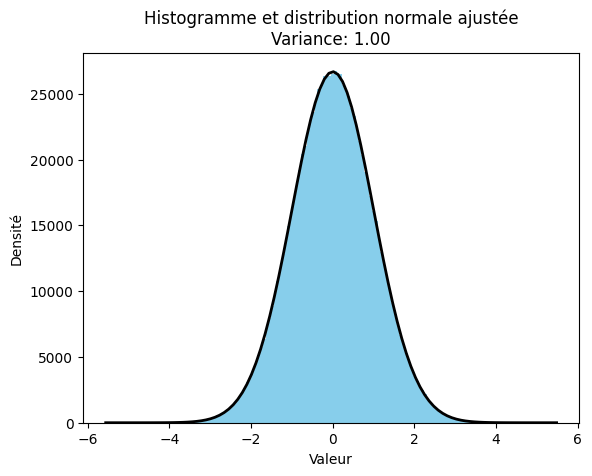

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

data = np.random.normal(0,1,1000000)
variance = np.var(data)
print("variance : ", np.var(data))
counts, bins, _= plt.hist(data, bins=150, color='skyblue')
plt.title("Normal Distribution Generated")

mu, std = stats.norm.fit(data)
print("moy:",mu," sig: ", std)
xmin, xmax = plt.xlim()
bin_width = bins[1] - bins[0]

x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x, mu, std) * len(data) * bin_width
plt.plot(x,p,'k', linewidth=2)
plt.title("Histogramme et distribution normale ajustée\nVariance: {:.2f}".format(variance))
plt.xlabel("Valeur")
plt.ylabel("Densité")
plt.show()


<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 1</h3>

Générer:

-   $X$ une variable aléatoire, 1000 répétitions d’une loi $U(0,1)$
-   $Y$ une variable aléatoire, 1000 répétitions d’une loi normale de moyenne nulle et de variance égale à 2
-   Vérifier la variance de $Y$ avec `np.var`

</div>

# 3. Indexation et *slicing*

## 3.1 Logique dans le cas d’un array unidimensionnel

La structure la plus simple est l’*array* unidimensionnel:

In [15]:
x = np.arange(10)
print(x)


[0 1 2 3 4 5 6 7 8 9]


L’indexation est dans ce cas similaire à celle d’une liste:

-   le premier élément est 0
-   le énième élément est accessible à la position $n-1$

La logique d’accès aux éléments est ainsi la suivante :

``` python
x[start:stop:step]
```

Avec un *array* unidimensionnel, l’opération de *slicing* (garder une coupe du *array*) est très simple.
Par exemple, pour garder les *K* premiers éléments d’un *array*, on fera:

``` python
x[: (K - 1)]
```

En l’occurrence, on sélectionne le K$^{eme}$ élément en utilisant

``` python
x[K - 1]
```

Pour sélectionner uniquement un élément, on fera ainsi:

In [16]:
x = np.arange(10)
x[2]


2

Les syntaxes qui permettent de sélectionner des indices particuliers d’une liste fonctionnent également
avec les *arrays*.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 2</h3>

Prenez `x = np.arange(10)` et…

-   Sélectionner les éléments 0, 3, 5 de `x`
-   Sélectionner les éléments pairs
-   Sélectionner tous les éléments sauf le premier
-   Sélectionner les 5 premiers éléments

</div>

In [17]:
x= np.arange(10)
print(x[0],x[3],x[5])

pairs = [x for x in x if x%2==0]
print("method 1 : ", pairs)
pairs2= []
for x in x:
    if x % 2 ==0:
        pairs2.append(x)
print("method 2 : ", pairs2)


0 3 5
method 1 :  [0, 2, 4, 6, 8]
method 2 :  [0, 2, 4, 6, 8]


## 3.2 Sur la performance

Un élément déterminant dans la performance de `Numpy` par rapport aux listes,
lorsqu’il est question de
*slicing* est qu’un array ne renvoie pas une
copie de l’élément en question (copie qui coûte de la mémoire et du temps)
mais simplement une vue de celui-ci.

Lorsqu’il est nécessaire d’effectuer une copie,
par exemple pour ne pas altérer l’*array* sous-jacent, on peut
utiliser la méthode `copy`:

``` python
x_sub_copy = x[:2, :2].copy()
```

## 3.3 Filtres logiques

Il est également possible, et plus pratique, de sélectionner des données à partir de conditions logiques
(opération qu’on appelle un ***boolean mask***).
Cette fonctionalité servira principalement à
effectuer des opérations de filtre sur les données.

Pour des opérations de comparaison simples, les comparateurs logiques peuvent être suffisants.
Ces comparaisons fonctionnent aussi sur les tableaux multidimensionnels grâce au
*broadcasting* sur lequel nous reviendrons :

In [18]:
# x = np.arange(10)
x2 = np.array([[-1, 1, -2], [-3, 2, 0]])
print(x)
print(x2)


9
[[-1  1 -2]
 [-3  2  0]]


In [19]:
x = np.arange(10)

print(x == 2)
print(x2 < 0)

list = [val for val in x if val<2]
print([val for val in x if val<2])
list2 = x[x<2]
print(x2[x2<5])

[False False  True False False False False False False False]
[[ True False  True]
 [ True False False]]
[0, 1]
[-1  1 -2 -3  2  0]


proportion  0.05079
11882.454511043588
-126.6286901514871
0.14848376812901162


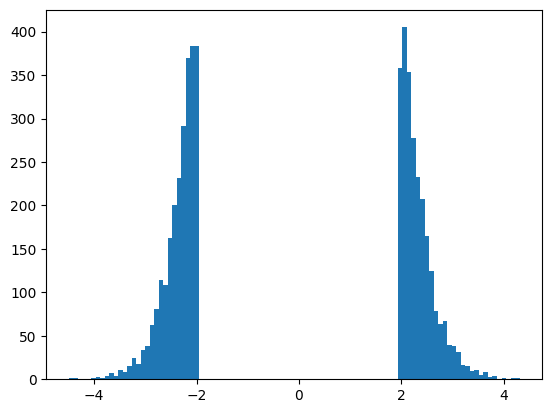

In [20]:
x = np.random.normal(size=100000)
list1 = x[np.abs(x)>1.96]
plt.hist(list1,100)
prop = list1.size/x.size
print("proportion ", prop)
sum = np.sum(abs(list1))
print(sum)
sum2 = np.sum(list1)
print(sum2)
prop2 = sum / np.sum(np.abs(x))
print(prop2)

Pour sélectionner les observations relatives à la condition logique,
il suffit d’utiliser la logique de *slicing* de `numpy` qui fonctionne avec les conditions logiques

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 3</h3>

Soit

``` python
x = np.random.normal(size=10000)
```

1.  Ne conserver que les valeurs dont la valeur absolue est supérieure à 1.96
2.  Compter le nombre de valeurs supérieures à 1.96 en valeur absolue et leur proportion dans l’ensemble
3.  Sommer les valeurs absolues de toutes les observations supérieures (en valeur absolue) à 1.96
    et rapportez les à la somme des valeurs de `x` (en valeur absolue)

</div>

Lorsque c’est possible, il est recommandé d’utiliser les fonctions logiques de `numpy` (optimisées et
qui gèrent bien la dimension).
Parmi elles, on peut retrouver:

-   `count_nonzero` ;
-   `isnan` ;
-   `any` ou `all`, notamment avec l’argument `axis` ;
-   `np.array_equal` pour vérifier, élément par élément, l’égalité.

Soient `x` un *array* multidimensionnel et `y` un *array* unidimensionnel présentant une valeur manquante.

In [62]:
x = np.random.normal(0, size=(3, 4))
y = np.array([np.nan,0, 1])

np.count_nonzero(y)
y.size - y[np.isnan(y)].size
np.array_equal(x,1) # vérifie si chaque élément vaut 1
print(x)
print(np.any(x>0, axis=0)) # test case par case si x > 0
print(np.any(np.any(x>0, axis=0))) # test s'il y a au moins case où x > 0 (axis =0 -> le long des colones)

print(np.any(np.any(x>0, axis=0))) # test s'il y a au moins case où x > 0 (axis =0 -> le long des lignes)

[[ 1.20293937  1.40152769  0.47261813 -0.05219105]
 [ 1.12802882  0.99016833 -1.49724247  1.21925101]
 [-1.04955958 -1.78579707  0.59209213 -0.3273993 ]]
[ True  True  True  True]
True
True


<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 4</h3>

1.  Utiliser `count_nonzero` sur `y`
2.  Utiliser `isnan` sur `y` et compter le nombre de valeurs non NaN
3.  Vérifier que `x` comporte au moins une valeur positive dans son ensemble, en parcourant les lignes puis les colonnes.

<details>

<summary>

Aide

</summary>

Jetez un oeil au paramètre `axis` en vous documentant sur internet. Par exemple [ici](https://www.sharpsightlabs.com/blog/numpy-axes-explained/).

</details>

</div>

# 4. Manipuler un *array*

## 4.1 Fonctions de manipulation

`Numpy` propose des méthodes ou des fonctions standardisées pour
modifier un array, voici un tableau en présentant quelques-unes:

| Opération | Implémentation |
|------------------------------|------------------------------------------|
| Aplatir un array | `x.flatten()` (méthode) |
| Transposer un array | `x.T` (méthode) ou `np.transpose(x)` (fonction) |
| Ajouter des éléments à la fin | `np.append(x, [1,2])` |
| Ajouter des éléments à un endroit donné (aux positions 1 et 2) | `np.insert(x, [1,2], 3)` |
| Supprimer des éléments (aux positions 0 et 3) | `np.delete(x, [0,3])` |

Pour combiner des array, on peut utiliser, selon les cas,
les fonctions `np.concatenate`, `np.vstack` ou la méthode `.r_` (concaténation *rowwise*).
`np.hstack` ou la méthode `.column_stack` ou `.c_` (concaténation *column-wise*)

In [63]:
x = np.random.normal(size=10)


Pour ordonner un array, on utilise `np.sort`

In [23]:
x = np.array([7, 2, 3, 1, 6, 5, 4])

np.sort(x)


array([1, 2, 3, 4, 5, 6, 7])

Si on désire faire un ré-ordonnement partiel pour trouver les *k* valeurs les plus petites d’un `array` sans les ordonner, on utilise `partition`:

In [24]:
np.partition(x, 3)


array([2, 1, 3, 4, 6, 5, 7])

## 4.2 Statistiques sur un *array*

Pour les statistiques descriptives classiques,
`Numpy` propose un certain nombre de fonctions déjà implémentées,
qui peuvent être combinées avec l’argument `axis`

In [ ]:
x = np.random.normal(0, size=(3, 4))
print(x)

print(np.sum(x,axis=0))
print(np.sum(np.sum(x,axis=0)))

print(np.sum(x,axis=1))
print(np.sum(np.sum(x,axis=1)))

np.sum(x)


def statdesc(x):
    moy = np.mean(x)
    var = np.var(x)
    print("moy : ", moy, "")


[[ 0.31431465  0.49678846  0.11745732  0.05179242]
 [-0.44578262  0.80628525 -0.41166924  0.97462235]
 [ 1.42239021 -1.74832139  0.59558052  0.03064624]]
[ 1.29092224 -0.44524768  0.3013686   1.057061  ]
2.204104159933052
[0.98035284 0.92345573 0.30029558]
2.2041041599330526


<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 5</h3>

1.  Faire la somme de tous les éléments d’un `array`, des éléments en ligne et des éléments en colonne. Vérifier
    la cohérence.
2.  Ecrire une fonction `statdesc` pour renvoyer les valeurs suivantes : moyenne, médiane, écart-type, minimum et maximum.
    L’appliquer sur `x` en jouant avec l’argument *axis*

</div>

# 5. *Broadcasting*

Le *broadcasting* désigne un ensemble de règles permettant
d’appliquer des opérations sur des tableaux de dimensions différentes. En pratique,
cela consiste généralement à appliquer une seule opération à l’ensemble des membres d’un tableau `numpy`.

La différence peut être comprise à partir de l’exemple suivant. Le *broadcasting* permet
de transformer le scalaire `5` en *array* de dimension 3:

In [26]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])

a + b
a + 5


array([5, 6, 7])

Le *broadcasting* peut être très pratique pour effectuer de manière efficace des opérations sur des données à
la structure complexe. Pour plus de détails, se rendre
[ici](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html) ou [ici](https://stackoverflow.com/questions/47435526/what-is-the-meaning-of-axis-1-in-keras-argmax).

## 5.1 Une application: programmer ses propres k-nearest neighbors

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice (un peu plus corsé)</h3>

1.  Créer `X` un tableau à deux dimensions (i.e. une matrice) comportant 10 lignes
    et 2 colonnes. Les nombres dans le tableau sont aléatoires.
2.  Importer le module `matplotlib.pyplot` sous le nom `plt`. Utiliser
    `plt.scatter` pour représenter les données sous forme de nuage de points.
3.  Constuire une matrice 10x10 stockant, à l’élément $(i,j)$, la distance euclidienne entre les points $X[i,]$ et $X[j,]$. Pour cela, il va falloir jouer avec les dimensions en créant des tableaux emboîtés à partir par des appels à `np.newaxis` :

-   En premier lieu, utiliser `X1 = X[:, np.newaxis, :]` pour transformer la matrice en tableau emboîté. Vérifier les dimensions
-   Créer `X2` de dimension `(1, 10, 2)` à partir de la même logique
-   En déduire, pour chaque point, la distance avec les autres points pour chaque coordonnées. Elever celle-ci au carré
-   A ce stade, vous devriez avoir un tableau de dimension `(10, 10, 2)`. La réduction à une matrice s’obtient en sommant sur le dernier axe. Regarder dans l’aide de `np.sum` comme effectuer une somme sur le dernier axe.
-   Enfin, appliquer la racine carrée pour obtenir une distance euclidienne en bonne et due forme.

1.  Vérifier que les termes diagonaux sont bien nuls (distance d’un point à lui-même…)
2.  Il s’agit maintenant de classer, pour chaque point, les points dont les valeurs sont les plus similaires. Utiliser `np.argsort` pour obtenir, pour chaque ligne, le classement des points les plus proches
3.  On va s’intéresser aux k-plus proches voisins. Pour le moment, fixons k=2. Utiliser `argpartition` pour réordonner chaque ligne de manière à avoir les 2 plus proches voisins de chaque point d’abord et le reste de la ligne ensuite
4.  Utiliser le morceau de code ci-dessous

</div>

<details><summary>Un indice pour représenter graphiquement les plus proches voisins</summary>

``` python
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, : K + 1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color="black")
```

</details>

Pour la question 2, vous devriez obtenir un graphique ayant cet aspect

For question 2, you should get a graph that looks like this:

Le résultat de la question 7 est le suivant :

Ai-je inventé cet exercice corsé ? Pas du tout, il vient de l’ouvrage [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/02.08-sorting.html#Example:-k-Nearest-Neighbors). Mais, si je vous l’avais indiqué immédiatement, auriez-vous cherché à répondre aux questions ?

Par ailleurs, il ne serait pas une bonne idée de généraliser cet algorithme à de grosses données. La complexité de notre approche est $O(N^2)$. L’algorithme implémenté par `Scikit-Learn` est
en $O[NlogN]$.

De plus, le calcul de distances matricielles en utilisant la puissance des cartes graphiques serait plus rapide. A cet égard, la librairie [faiss](https://github.com/facebookresearch/faiss) ou les *frameworks* spécialisés dans le calcul de distance entre des vecteurs à haute dimension comme [ChromaDB](https://www.trychroma.com/)
offrent des performances beaucoup plus satisfaisantes que celles que permettraient `Numpy` sur ce problème précis.

# 6. Exercices supplémentaires

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Comprendre le principe de l’algorithme PageRank</h3>

`Google` est devenu célèbre grâce à son algorithme `PageRank`. Celui-ci permet, à partir
de liens entre sites *web*, de donner un score d’importance à un site *web* qui va
être utilisé pour évaluer sa centralité dans un réseau.
L’objectif de cet exercice est d’utiliser `Numpy` pour mettre en oeuvre un tel
algorithme à partir d’une matrice d’adjacence qui relie les sites entre eux.

1.  Créer la matrice suivante avec `numpy`. L’appeler `M`:

$$
\begin{bmatrix}
0 & 0 & 0 & 0 & 1 \\
0.5 & 0 & 0 & 0 & 0 \\
0.5 & 0 & 0 & 0 & 0 \\
0 & 1 & 0.5 & 0 & 0 \\
0 & 0 & 0.5 & 1 & 0
\end{bmatrix}
$$

1.  Pour représenter visuellement ce *web* minimaliste,
    convertir en objet `networkx` (une librairie spécialisée
    dans l’analyse de réseau) et utiliser la fonction `draw`
    de ce package.

Il s’agit de la transposée de la matrice d’adjacence
qui permet de relier les sites entre eux. Par exemple,
le site 1 (première colonne) est référencé par
les sites 2 et 3. Celui-ci ne référence que le site 5.

1.  A partir de la page wikipedia anglaise de `PageRank`, tester
    sur votre matrice.

</div>

Le site 1 est assez central car il est référencé 2 fois. Le site
5 est lui également central puisqu’il est référencé par le site 1.